## Исследование данных о российском кинопрокате



*Цель исследования:*
Необходимо изучить рынок российского кинопроката и выявить текущие тренды. Уделим внимание фильмам, которые получили государственную поддержку. Попробуем ответить на вопрос, насколько такие фильмы интересны зрителю.
Будем работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

*Этапы исследования:*
1. Откроем файлы с данными и объединим их в один датафрейм
2. Предобработка данных
3. Проведем исследовательский анализ данных:
 - изучим выход фильмов по годам, найдем закономерности.
 - изучим, как менялась динамика проката по годам.
 - определим, влияет ли возрастное ограничение аудитории на сборы фильма в прокате в период с 2015 по 2019 год.
4. Исследуем фильмы, которые получили государственную поддержку
5. Сделаем общий вывод

**Описание данных**

Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.

`title` — название фильма;

`puNumber` — номер прокатного удостоверения;

`show_start_date` — дата премьеры фильма;

`type` — тип фильма;

`film_studio` — студия-производитель;

`production_country` — страна-производитель;

`director` — режиссёр;

`producer` — продюсер;

`age_restriction` — возрастная категория;

`refundable_support` — объём возвратных средств государственной поддержки;

`nonrefundable_support` — объём невозвратных средств государственной поддержки;

`financing_source` — источник государственного финансирования;

`budget` — общий бюджет фильма;

`ratings` — рейтинг фильма на КиноПоиске;

`genres` — жанр фильма.

Столбец `budget` уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.

Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.

`puNumber` — номер прокатного удостоверения;

`box_office` — сборы в рублях.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/datasets/mkrf_movies.csv')

In [3]:
df_shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [4]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [7]:
df_shows.head()

,puNumber,box_office
0,111000113,2450.000
1,111000115,61040.000
2,111000116,153030013.400
3,111000117,12260956.000
4,111000118,163684057.790


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [9]:
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Итак, у нас есть 2 таблицы, которые необходимо объединить. Объединить их мы можем по столбцу `puNumber`. Однако, мы видим, что у них разные типы данных. 

При попытке просто перевести столбец в числовое значение, выпала ошибка, что есть ячейка со значением "нет"

In [10]:
df.query('puNumber == "нет"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Создадим функцию, которая приведет столбец к нужному типу данных.

In [11]:
def convert_to_int(val):
  if val != 'нет':
    return int(val)
  return float('nan')

In [12]:
df['puNumber'] = df['puNumber'].apply(convert_to_int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Объединим таблицы

In [14]:
df = df.merge(df_shows, on='puNumber', how='left')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Объединили таблицы по номеру прокатного удостоверения.

Видим, что данные очень неоднородные - есть много пропусков в данных по фильмам с господдержкой, если быть точнее, то данных там очень мало. Нужно будет изменить тип данных в столбцах с датой и рейтингом, проверив перед этим почему этим столбцам присвоился тип object.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [17]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915.000,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716.000,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416.000,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916.000,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815.000,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


show_start_date приведем к дате.

In [18]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'])

Посмотрим что у нас в столбце ratings, почему в нем тип данных object?

In [19]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Есть процентные значения, переведем их в число и переведем весь столбец во float

In [20]:
df['ratings'] = df['ratings'].str.replace('%', '').astype('float')

In [21]:
def fix_ratings(val):
    if val > 10:
        return val / 10
    return val

In [22]:
df['ratings'] = df['ratings'].apply(fix_ratings)

In [23]:
df['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7485 non-null   float64            
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Остальные столбцы можно оставить как есть.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

Посмотрим сколько у нас всего пропусков во всех столбцах

In [25]:
display(df.isnull().sum())

title                       0
puNumber                    1
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

In [26]:
pd.DataFrame(round(df.isna().mean()*100,)).sort_values(0).style.background_gradient('coolwarm')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
age_restriction,0.000000
producer,8.000000
ratings,13.000000


Посмотрим что у нас в строках с пропусками в столбцах puNumber, production_country и director

In [27]:
df.loc[df['puNumber'].isnull() | df['production_country'].isnull() | df['director'].isnull()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512.000,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,44350.000
1735,Помпеи. Британский музей,126003413.000,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),NaN,2014-05-15 12:00:00+00:00,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216.000,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.200,"детский,комедия",194527.000
3840,Зур концерт (Большой концерт).,217027010.000,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310.000,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4298,Изге Вэли (Святой Валентин),217020610.000,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4415,Bon Jovi. The Circle Tour,126001710.000,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.900,"концерт,музыка",NaN
4441,Мульт личности. Выпуск 5,214000410.000,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.000,"мультфильм,комедия",NaN
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111.000,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Пропуски в столбце со страной можно заполнить вручную.

In [28]:
df['production_country'] = df['production_country'].fillna('Россия')

Строка с пустым значением в puNumber вообще содержит мало данных и малоинформативна удалим ее. Строки с пустыми значениями с режиссером судя по всему содержат данные по концертам, режиссера мы вряд ли заполним, удалим эти строки.

In [29]:
df = df.dropna(subset=['puNumber', 'director']).reset_index()

In [30]:
display(df.isnull().sum())

index                       0
title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                17
production_country          0
director                    0
producer                  564
age_restriction             0
refundable_support       7144
nonrefundable_support    7144
budget                   7144
financing_source         7144
ratings                   960
genres                    969
box_office               4319
dtype: int64

Попробуем заполнить пропуски в film_studio, producer, ratings, genres взяв недостающую информацию в повторах фильмов (по названию)

In [31]:
list_for_fill = ['film_studio', 'producer', 'ratings', 'genres']

In [32]:
df[list_for_fill] = df.groupby('title')[list_for_fill].transform('first')

In [33]:
display(df[list_for_fill].isnull().sum())

film_studio     17
producer       559
ratings        960
genres         969
dtype: int64

Заполнилось всего несколько значений в столбце producer. Больше нам данные взять неоткуда, только если гуглить отдельно по каждому фильму, но это очень трудозатратно, поэтому оставим как есть.

In [34]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
index,0.000000
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
producer,7.000000
age_restriction,0.000000


Данные по сборам, а также по столбцам с данными по господдержке также оставим как есть. Данные по сборам у нас были во второй таблице больше данных у нас нет, и их маловато для заполнения средними значениями.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [35]:
df.duplicated().sum()

0

Явных дубликатов полностью по датафрейму нет. Посмотрим что у нас по столбцам.

In [36]:
df['puNumber'].duplicated().sum()

2

In [37]:
df.loc[df['puNumber'].duplicated(keep=False)]

,index,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4630,4638,Как жениться и остаться холостым,221154310.000,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.000,"мелодрама,комедия",NaN
4631,4639,Иоанна - женщина на папском престоле /По роман...,221154310.000,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.600,"драма,мелодрама,история",NaN
5057,5067,Анализируй это!,221054410.000,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.400,"комедия,криминал",NaN
5058,5068,Анализируй то!,221054410.000,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.800,"комедия,криминал",NaN


Тут явно какая-то ошибка в данных - одного прокатного удостоверения на разные фильмы не может быть. Этот номер не имеет принципиального значения, оставлю как есть.


Посмотрим что у нас в названиях фильмов.

In [38]:
df['title'].duplicated().sum()

714

In [39]:
df.loc[df['title'].duplicated(keep=False)].sort_values('title').head(30)

,index,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
455,455,100 миллионов евро,121013712.000,2012-06-06 12:00:00+00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.100,комедия,NaN
454,454,100 миллионов евро,221024616.000,2016-05-25 12:00:00+00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.100,комедия,NaN
4844,4852,127 часов,121000811.000,2011-01-27 12:00:00+00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.700,"триллер,биография,драма",NaN
5048,5058,127 часов,221069011.000,2011-05-18 12:00:00+00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.700,"триллер,биография,драма",NaN
3126,3129,13 часов: Тайные солдаты Бенгази,221019616.000,2016-04-19 12:00:00+00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.700,"боевик,триллер,драма",NaN
3127,3130,13 часов: Тайные солдаты Бенгази,121001016.000,2016-01-15 12:00:00+00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.700,"боевик,триллер,драма",18439240.550
1493,1494,13-й район: Кирпичные особняки,121008314.000,2014-04-25 12:00:00+00:00,Художественный,"Брик Мэншэнс Продакшнз,Синэ+ Канал+, Д8, Европ...",Франция-Канада,Камиль Деламарр,"Люк Бессон, Клод Леже, Джонатан Вэнджер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.500,"боевик,криминал",750.000
1492,1493,13-й район: Кирпичные особняки,221033314.000,2014-08-20 12:00:00+00:00,Художественный,"Брик Мэншэнс Продакшнз,Синэ+ Канал+, Д8, Европ...",Франция-Канада,Камиль Деламарр,"Люк Бессон, Клод Леже, Джонатан Вэнджер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.500,"боевик,криминал",NaN
4102,4107,13.,221123710.000,2010-10-25 12:00:00+00:00,Художественный,"Барбариан Филмз, Магнет Медиа Групп, Морабито ...",США,Гела Баблуани,None,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.800,"триллер,драма,криминал",NaN
4301,4307,13.,121018110.000,2010-09-30 12:00:00+00:00,Художественный,"Барбариан Филмз, Магнет Медиа Групп, Морабито ...",США,Гела Баблуани,None,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.800,"триллер,драма,криминал",NaN


In [40]:
df[['title','film_studio']].duplicated().sum()

714

В столбце с названием фильма есть дубликаты, т.е. у одного и того же фильма несколько прокатных удостоверений, что вполне себе возможно если прокатное удостоверение выдавалось в разные сроки и для разных прокатных целей. В конце концов, фильм мог поменять правообладателя, название или даже быть немного изменён для каких-либо творческих или коммерческих целей. Не будем от них избавляться, так как они могли выходить в прокат в разные годы и соответсвенно по разным прокатным удостоверениям у них могут быть разные сборы.

В остальных столбцах вполне могут быть дубликаты.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

Посмотрим что у нас с неявными дубликатами в столбце type

In [41]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Удалим лишние пробелы

In [42]:
df['type'] = df['type'].str.strip()

In [43]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

Посмотрим остальные категориальные столбцы

In [44]:
df['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

В production_country стоит заменить дефисы и пробелы на запятые

In [45]:
df['production_country'].nunique()

950

In [46]:
df['production_country'] = df['production_country'].dropna().apply(lambda x: ', '.join([x.strip() for x in x.split('-')]))

In [47]:
df['production_country'].nunique()

813

In [48]:
for column in ['director', 'producer', 'film_studio', 'production_country', 'genres']:
    
    print('уникальные значения в', column)
    print('  было', df[column].nunique())
    
    df[column] = df[column].dropna().apply(lambda x: ', '.join([x.strip() for x in x.split(',')]))
    
    print('  стало', df[column].nunique())
    print()

уникальные значения в director
  было 4811
  стало 4800

уникальные значения в producer
  было 5306
  стало 5290

уникальные значения в film_studio
  было 5441
  стало 5413

уникальные значения в production_country
  было 813
  стало 812

уникальные значения в genres
  было 742
  стало 742



In [49]:
df['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [50]:
df['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

Со столбцами age_restriction и financing_source все хорошо.

Основная проблема категориальных столбцов в том, что в одной ячейке может быть несколько значений, перечисленных через запятые или дефис в различном порядке, также много лишних пробелов. Мы постарались от всего этого избавиться.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [51]:
df[['refundable_support', 'nonrefundable_support', 'financing_source', 'budget', 'box_office']].describe()

,refundable_support,nonrefundable_support,budget,box_office
count,332.000,332.000,332.000,3157.000
mean,11864457.831,48980988.892,127229716.684,76502907.231
std,24916555.264,59980117.923,188588333.115,240387347.042
min,0.000,0.000,0.000,0.000
25%,0.000,25000000.000,42000000.000,86386.000
50%,0.000,30000000.000,68649916.000,2330104.000
75%,15000000.000,40375000.000,141985319.500,23983117.700
max,180000000.000,400000000.000,2305074303.000,3073568690.790


Видим, что в столбце budget есть нулевые значения, что странно, с учетом того, что столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. Посмотрим на на них

In [52]:
null_budget = df[df['budget'] == 0]

In [53]:
null_budget

,index,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2050,2053,14+,111023614.000,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.000,23000000.000,0.000,"Министерство культуры, Фонд кино",6.600,мелодрама,10234016.100
2055,2058,Дуxless 2,111000415.000,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.000,75000000.000,0.000,Фонд кино,6.600,драма,446163511.000
2469,2472,Воин (2015),111017315.000,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.000,70000000.000,0.000,Фонд кино,7.800,"боевик, драма, криминал",196572438.400
2529,2532,Бармен.,111009615.000,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.000,0.000,0.000,Фонд кино,6.200,"комедия, фэнтези",67418974.800
2612,2615,Савва. Сердце воина,114001715.000,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.000,100000000.000,0.000,Фонд кино,4.600,"мультфильм, приключения, фэнтези",184487551.400
2681,2684,Тряпичный союз,111010215.000,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.000,59000000.000,0.000,Фонд кино,6.300,"комедия, драма",1957738.510
2785,2788,Срочно выйду замуж,111017115.000,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.000,35000000.000,0.000,Фонд кино,5.100,"комедия, мелодрама",72937783.200
2871,2874,Помню - не помню!,111004916.000,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.000,6000000.000,0.000,Министерство культуры,4.300,комедия,15362931.430
3044,3047,Любовь с ограничениями,111008216.000,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.000,51000000.000,0.000,Фонд кино,6.300,"комедия, мелодрама",70299052.000
3562,3565,Притяжение (2016),111018116.000,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.000,250000000.000,0.000,Фонд кино,5.600,фантастика,1038321489.000


Выясним в каком объёме обычно оказывалась поддержка и заменим медианным значением от поддержки. Для этого суммируем оба вида господдержки и разделим на общий бюджет.

In [54]:
df['support_percentage'] = (df['refundable_support'] + df['nonrefundable_support']) / df['budget']

In [55]:
df['support_percentage'].median()

0.6140376284219444

In [56]:
df.loc[null_budget.index, 'budget'] = (
    (df.loc[null_budget.index, 'refundable_support'] + df.loc[null_budget.index, 'nonrefundable_support']) / \
    df['support_percentage'].median()
)

In [57]:
df.loc[null_budget.index]

,index,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percentage
2050,2053,14+,111023614.000,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.000,23000000.000,37456987.871,"Министерство культуры, Фонд кино",6.600,мелодрама,10234016.100,inf
2055,2058,Дуxless 2,111000415.000,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.000,75000000.000,122142351.753,Фонд кино,6.600,драма,446163511.000,inf
2469,2472,Воин (2015),111017315.000,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.000,70000000.000,130285175.203,Фонд кино,7.800,"боевик, драма, криминал",196572438.400,inf
2529,2532,Бармен.,111009615.000,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.000,0.000,32571293.801,Фонд кино,6.200,"комедия, фэнтези",67418974.800,inf
2612,2615,Савва. Сердце воина,114001715.000,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.000,100000000.000,260570350.405,Фонд кино,4.600,"мультфильм, приключения, фэнтези",184487551.400,inf
2681,2684,Тряпичный союз,111010215.000,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.000,59000000.000,96085316.712,Фонд кино,6.300,"комедия, драма",1957738.510,inf
2785,2788,Срочно выйду замуж,111017115.000,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.000,35000000.000,56999764.151,Фонд кино,5.100,"комедия, мелодрама",72937783.200,inf
2871,2874,Помню - не помню!,111004916.000,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.000,6000000.000,9771388.140,Министерство культуры,4.300,комедия,15362931.430,inf
3044,3047,Любовь с ограничениями,111008216.000,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.000,51000000.000,113999528.302,Фонд кино,6.300,"комедия, мелодрама",70299052.000,inf
3562,3565,Притяжение (2016),111018116.000,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.000,250000000.000,407141172.508,Фонд кино,5.600,фантастика,1038321489.000,inf


Мы выяснили, что в бюджете у фильмов с господдержкой доля самой господдержки в среднем около 61%. Таким образом заполнили недостающие данные по фильмам с господдержкой.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [58]:
df['show_start_year'] = df['show_start_date'].dt.year

In [59]:
df.head()

,index,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percentage,show_start_year
0,0,Открытый простор,221048915.000,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.200,"боевик, драма, мелодрама",NaN,NaN,2015
1,1,Особо важное задание,111013716.000,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.600,"драма, военный",NaN,NaN,2016
2,2,Особо опасен,221038416.000,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика, боевик, триллер",NaN,NaN,2016
3,3,Особо опасен,221026916.000,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика, боевик, триллер",NaN,NaN,2016
4,4,Особо опасен,221030815.000,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика, боевик, триллер",NaN,NaN,2015


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [60]:
def split_col(val):
    try:
        return val.split(',')[0]
    except:
        pass

In [61]:
df['main_director'] = df['director'].apply(split_col)

In [62]:
df['main_genre'] = df['genres'].apply(split_col)

In [63]:
df.head()

,index,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percentage,show_start_year,main_director,main_genre
0,0,Открытый простор,221048915.000,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.200,"боевик, драма, мелодрама",NaN,NaN,2015,Кевин Костнер,боевик
1,1,Особо важное задание,111013716.000,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.600,"драма, военный",NaN,NaN,2016,Е.Матвеев,драма
2,2,Особо опасен,221038416.000,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика, боевик, триллер",NaN,NaN,2016,Тимур Бекмамбетов,фантастика
3,3,Особо опасен,221026916.000,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика, боевик, триллер",NaN,NaN,2016,Тимур Бекмамбетов,фантастика
4,4,Особо опасен,221030815.000,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика, боевик, триллер",NaN,NaN,2015,Тимур Бекмамбетов,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

Столбец мы создали ранее, проверим что у нас в столбце и внесем в него данные по тем фильмам, по которым мы вносили бюджет ранее равный 0.

In [64]:
df['support_percentage'].unique()

array([       nan, 0.33370314, 0.7       , 0.61269064, 0.69009473,
       0.62476381, 0.48216008, 0.67999951, 0.53940683, 0.53743599,
       0.69999998, 0.7       , 0.68947448, 0.35272785, 0.27723917,
       0.37378187,        inf, 0.50121231, 0.12963849, 0.62962963,
       0.65702441, 0.66656877, 0.21      , 0.12      , 0.40975944,
       0.25      , 0.66896323, 0.67994543, 0.69767442, 0.38758813,
       0.52737763, 0.22192632, 0.33671433, 0.68992812, 0.69286755,
       0.42581383, 0.36235166, 0.62036062, 0.65331017, 0.69910397,
       0.17783734, 0.69840404, 0.36146563, 0.66268254, 0.67516879,
       0.66392217, 0.69999999, 0.43054823, 0.70000001, 0.68297529,
       0.69      , 0.32432432, 0.6024407 , 0.63778177, 0.6224779 ,
       0.62459948, 0.29917895, 0.695     , 0.69999999, 0.64974102,
       0.55555556, 0.36759115, 0.68717703, 0.62287229, 0.69444444,
       0.48231756, 0.69996216, 0.67122405, 0.36097849, 0.34069436,
       0.66666667, 0.62591548, 0.5931632 , 0.37313433, 0.59226

Заполним значения inf медианой

In [65]:
df['support_percentage'] = df['support_percentage'].replace(np.inf, 0.6140376284219444)

In [66]:
df['support_percentage'].unique()

array([       nan, 0.33370314, 0.7       , 0.61269064, 0.69009473,
       0.62476381, 0.48216008, 0.67999951, 0.53940683, 0.53743599,
       0.69999998, 0.7       , 0.68947448, 0.35272785, 0.27723917,
       0.37378187, 0.61403763, 0.50121231, 0.12963849, 0.62962963,
       0.65702441, 0.66656877, 0.21      , 0.12      , 0.40975944,
       0.25      , 0.66896323, 0.67994543, 0.69767442, 0.38758813,
       0.52737763, 0.22192632, 0.33671433, 0.68992812, 0.69286755,
       0.42581383, 0.36235166, 0.62036062, 0.65331017, 0.69910397,
       0.17783734, 0.69840404, 0.36146563, 0.66268254, 0.67516879,
       0.66392217, 0.69999999, 0.43054823, 0.70000001, 0.68297529,
       0.69      , 0.32432432, 0.6024407 , 0.63778177, 0.6224779 ,
       0.62459948, 0.29917895, 0.695     , 0.69999999, 0.64974102,
       0.55555556, 0.36759115, 0.68717703, 0.62287229, 0.69444444,
       0.48231756, 0.69996216, 0.67122405, 0.36097849, 0.34069436,
       0.66666667, 0.62591548, 0.5931632 , 0.37313433, 0.59226

Мы создали новые столбцы с годом выхода фильма в прокат, основными режиссером и жанром, а также с долей господдержки от общего бюджета фильма

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [67]:
df_release = df.pivot_table(index='show_start_year', values=['box_office', 'title'], aggfunc='count')

In [68]:
df_release.columns = ['release', 'summary']

In [69]:
df_release

,release,summary
show_start_year,,
2010,105,980
2011,109,620
2012,127,592
2013,184,629
2014,279,806
2015,465,705
2016,526,818
2017,357,505
2018,475,891


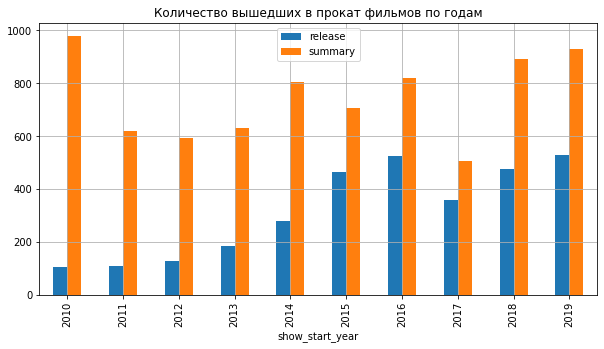

In [70]:
df_release.plot( 
    kind='bar', 
    grid=True, 
    title='Количество вышедших в прокат фильмов по годам',
    figsize=(10,5)
)
plt.show()

In [71]:
df_release_share = df_release['release'] / df_release['summary']

In [72]:
df_release_share

show_start_year
2010   0.107
2011   0.176
2012   0.215
2013   0.293
2014   0.346
2015   0.660
2016   0.643
2017   0.707
2018   0.533
2019   0.570
dtype: float64

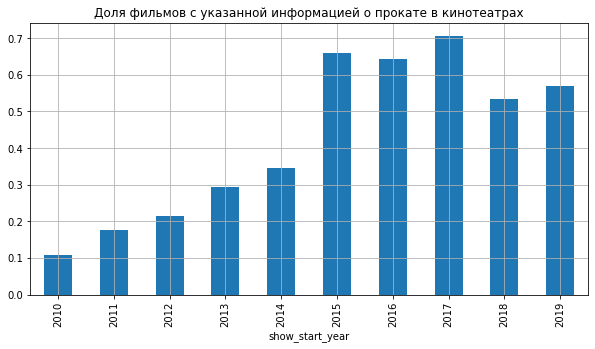

In [73]:
df_release_share.plot(
    kind='bar', 
    grid=True, 
    title='Доля фильмов с указанной информацией о прокате в кинотеатрах',
    figsize=(10,5)
)
plt.show()

In [74]:
print(f'Доля фильмов, для которых есть информация о сборах: {df.box_office.notna().mean():.2f}')

Доля фильмов, для которых есть информация о сборах: 0.42


Мы построили графики, на которых видно, что больше всего вышло фильмов в 2010 и 2019, а меньше всего в 2017. При этом информация о сборах у нас есть только о 42% фильмов, больше всего информации у нас есть по фильмам, вышедшим в 2015-2017 гг.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [75]:
pivot_box_office = df.pivot_table(
    index='show_start_year', 
    values='box_office', 
    aggfunc=['sum','mean','median']
)

In [76]:
pivot_box_office.columns = ['sum','mean','median']

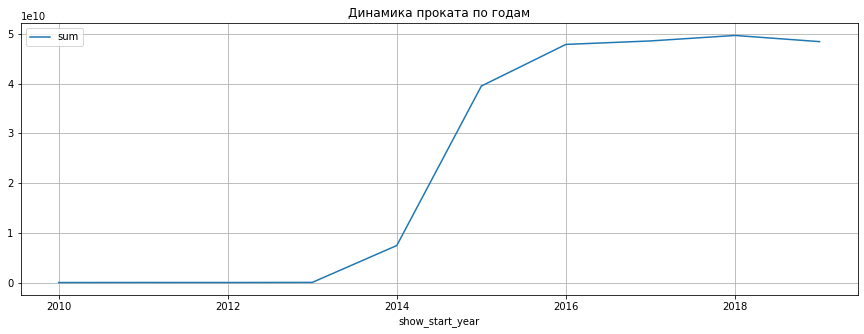

In [77]:
pivot_box_office.plot(
    kind='line', 
    y='sum',
    grid=True,
    title='Динамика проката по годам',
    figsize=(15,5)
)
plt.show()

In [78]:
pivot_box_office.sort_values('sum', ascending=False)

,sum,mean,median
show_start_year,,,
2018,49668403134.320,104565059.230,8891102.210
2017,48563707217.510,136032793.326,9968340.000
2019,48425708779.590,91369261.848,4627798.345
2016,47866299741.910,91000569.852,3846679.410
2015,39497365196.400,84940570.315,4920933.000
2014,7444951859.200,26684415.266,18160.000
2013,29799706.200,161954.925,3522.500
2011,14102765.000,129383.165,3000.000
2012,6911073.000,54417.898,5560.000


В период с 2010 по 2018 год сборы росли, в 2019 наблюдается небольшой спад. Минимальные сборы были в 2010, максимальные - в 2018. Однако, с учетом того, что информации по сборам именно в 2010 у нас меньше всего (10%), данные по сборам в этом году малоинформативны. Поэтому посмотрим на данные 2015-2019 годов, там доля имеющейся информации по сборам более 50%. В данном срезе - минимальные сборы у нас в 2015 году.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [79]:
pivot_box_office[['mean','median']]

,mean,median
show_start_year,,
2010,23130.038,1700.000
2011,129383.165,3000.000
2012,54417.898,5560.000
2013,161954.925,3522.500
2014,26684415.266,18160.000
2015,84940570.315,4920933.000
2016,91000569.852,3846679.410
2017,136032793.326,9968340.000
2018,104565059.230,8891102.210


In [80]:
pivot_box_office[['mean','median']].describe()

,mean,median
count,10.000,10.000
mean,53496155.586,3228679.547
std,53100362.564,3867316.200
min,23130.038,1700.000
25%,137526.105,4031.875
50%,55812492.790,1932419.705
75%,91277088.849,4847649.336
max,136032793.326,9968340.000


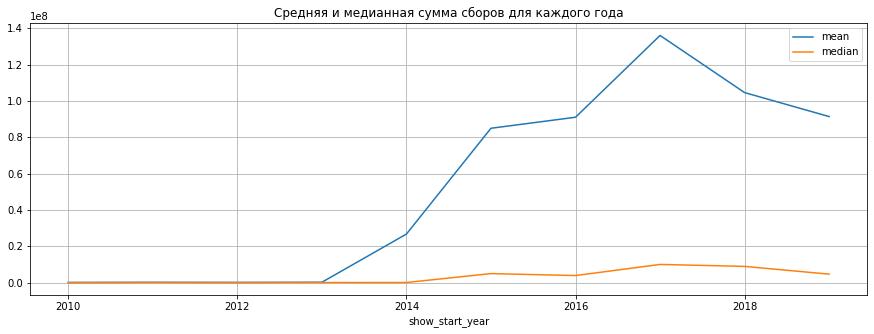

In [81]:
pivot_box_office[['mean','median']].plot(
    kind='line', 
    grid=True,
    title='Cредняя и медианная сумма сборов для каждого года',
    figsize=(15,5)
)
plt.show()

Видим, что среднее сильно отличается от медианы, что говорит о том, что информация о сборах очень разнородная - какие-то фильмы собирают гораздо больше других фильмов, что как мне кажется вполне нормально.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

Так как данных за период 2010-2014 по сборам у нас очень мало посмотрим данные за 2015-2019 гг. 

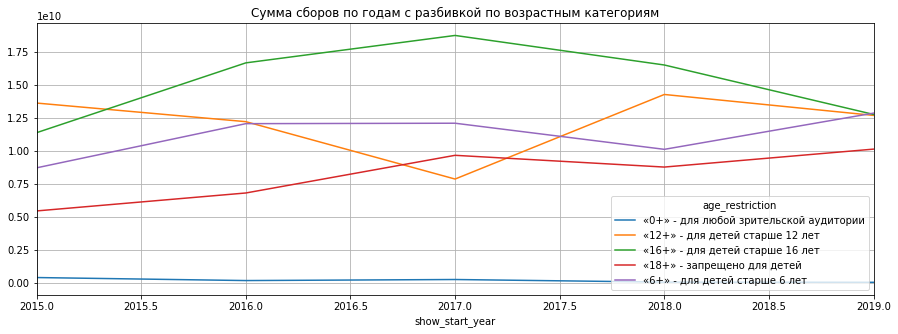

In [82]:
df.pivot_table(
    index='show_start_year',
    columns='age_restriction',
    values='box_office',
    aggfunc='sum'
).plot(
    kind='line', 
    grid=True,
    title='Cумма сборов по годам с разбивкой по возрастным категориям',
    figsize=(15,5),
    xlim=[2015, 2019]
)
plt.show()

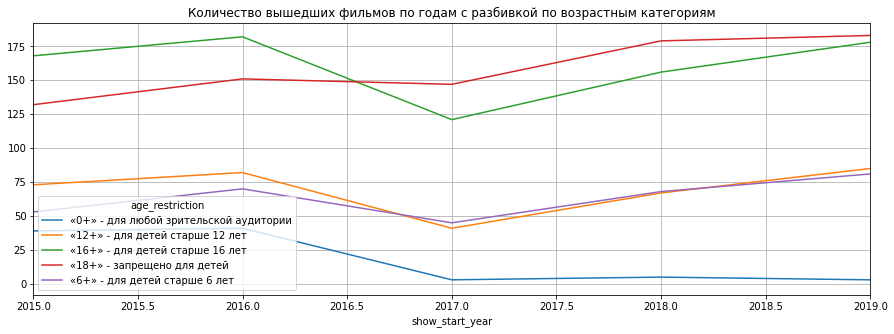

In [83]:
df.pivot_table(
    index='show_start_year',
    columns='age_restriction',
    values='box_office',
    aggfunc='count'
).plot(
    kind='line', 
    grid=True,
    title='Количество вышедших фильмов по годам с разбивкой по возрастным категориям',
    figsize=(15,5),
    xlim=[2015, 2019]
)
plt.show()

Меньше всего собирают фильмы 0+, скорее всего из-за того, что их не так много выходит и детям младше 6 лет не очень интересно ходить в кино, в отличие от тех же категорий 6+ и 12+. Больше всего сборов у фильмов 16+. Чаще всего в кино ходит молодежь, да и взрослые тоже любят кино. А вот по фильмам 18+ интересная особенность - выходит их довольно много, но сборов мало. Скорее всего это связано со спецификой самих фильмов - ужасы, например, не все любят.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [84]:
df_supported = df[df['budget'].notna()].reset_index()

In [85]:
df_supported[['refundable_support', 'nonrefundable_support', 'budget', 'ratings', 'box_office', 'support_percentage']].describe()

,refundable_support,nonrefundable_support,budget,ratings,box_office,support_percentage
count,332.000,332.000,332.000,316.000,318.000,332.000
mean,11864457.831,48980988.892,134057765.841,6.021,132432420.046,0.522
std,24916555.264,59980117.923,187685540.484,1.149,334837856.986,0.167
min,0.000,0.000,9771388.140,1.000,1550.000,0.044
25%,0.000,25000000.000,46153971.750,5.300,1236675.500,0.385
50%,0.000,30000000.000,74592550.000,6.200,15720067.715,0.613
75%,15000000.000,40375000.000,150002143.250,6.700,106373008.273,0.655
max,180000000.000,400000000.000,2305074303.000,9.400,3073568690.790,0.785


Создадим новые столбцы:
1. С общей суммой господдержки
2. С общей окупаемостью. Для этого отнимем от общей суммы бюджета сумму сборов
3. С окупаемостью по отношению к господдержке. Для этого отнимем от общей суммы господдержки сумму сборов
4. С маркером - фильм окупился или нет

In [86]:
df_supported['full_support'] = df_supported['nonrefundable_support'] + df_supported['refundable_support']

In [87]:
df_supported['profit'] = df_supported['box_office'] - df_supported['budget']

In [88]:
df_supported['profit_support'] = df_supported['box_office'] - df_supported['full_support']

In [89]:
df_supported['paid_off'] = df_supported['profit'] >= 0

In [90]:
df_supported['not_paid_off'] = df_supported['profit'] < 0

In [91]:
df_supported.head()

,level_0,index,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percentage,show_start_year,main_director,main_genre,full_support,profit,profit_support,paid_off,not_paid_off
0,1280,1281,Пока еще жива,111005313.000,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.000,26500000.000,79411900.000,Министерство культуры,8.100,"драма, мелодрама",365353.600,0.334,2013,А.Атанесян,драма,26500000.000,-79046546.400,-26134646.400,False,True
1,1447,1448,Бесславные придурки,111003314.000,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.000,26000000.000,37142857.000,Министерство культуры,NaN,NaN,28140.000,0.700,2014,А.Якимчук,None,26000000.000,-37114717.000,-25971860.000,False,True
2,1497,1498,Невидимки,111004213.000,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.000,107847945.000,176023490.000,Фонд кино,5.300,"комедия, фантастика",19957031.500,0.613,2013,Р.Давлетьяров,комедия,107847945.000,-156066458.500,-87890913.500,False,True
3,1523,1524,БЕРЦЫ,111004314.000,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.000,28000000.000,40574140.000,Министерство культуры,4.200,драма,55917.500,0.690,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,28000000.000,-40518222.500,-27944082.500,False,True
4,1790,1792,Братья Ч,111004414.000,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.000,25000000.000,40015122.000,Министерство культуры,6.400,драма,232100.000,0.625,2014,М.Угаров,драма,25000000.000,-39783022.000,-24767900.000,False,True


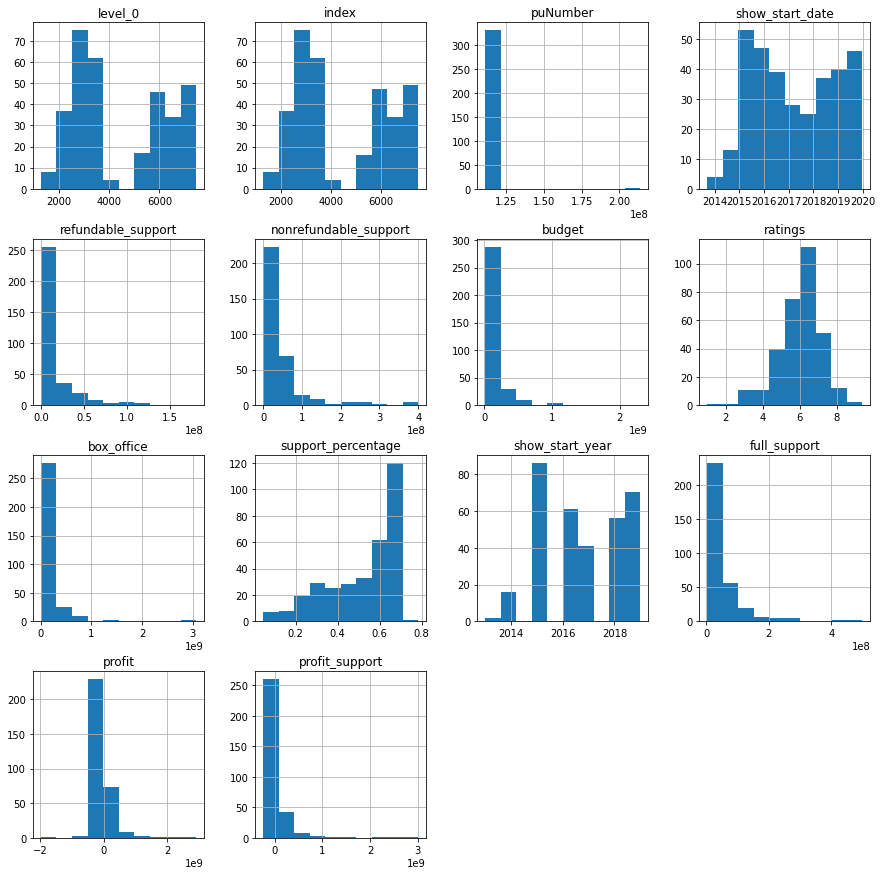

In [92]:
df_supported.hist(figsize=(15, 15))
plt.show()

Итак, на первый взгляд мы видим, что больше всего фильмов с господдержкой вышло в 2015 году, а меньше всего поддерживали киноиндустрию в 2013. С 2016 господдержка начала уменьшаться по количеству фильмов, а с 2019 снова стала расти.
Средний рейтинг у таких фильмов - 6,2. У большей части фильмов доля господдержки порядка 60%. Ну и самое главное - большая часть всех этих фильмов не окупается.

Теперь посмотрим что у нас получится в разбивке по жанрам и режиссерам.

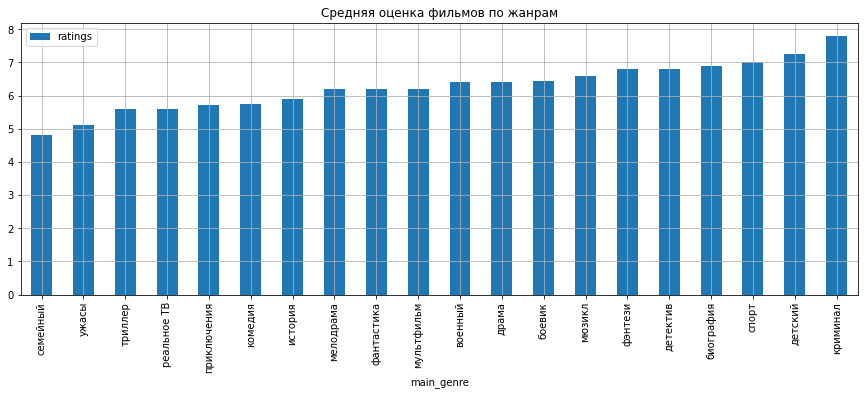

In [93]:
df_supported.pivot_table(
    index='main_genre',
    values='ratings',
    aggfunc='median'
).sort_values('ratings').plot(
    kind='bar', 
    grid=True,
    title='Cредняя оценка фильмов по жанрам',
    figsize=(15,5)
)
plt.show()

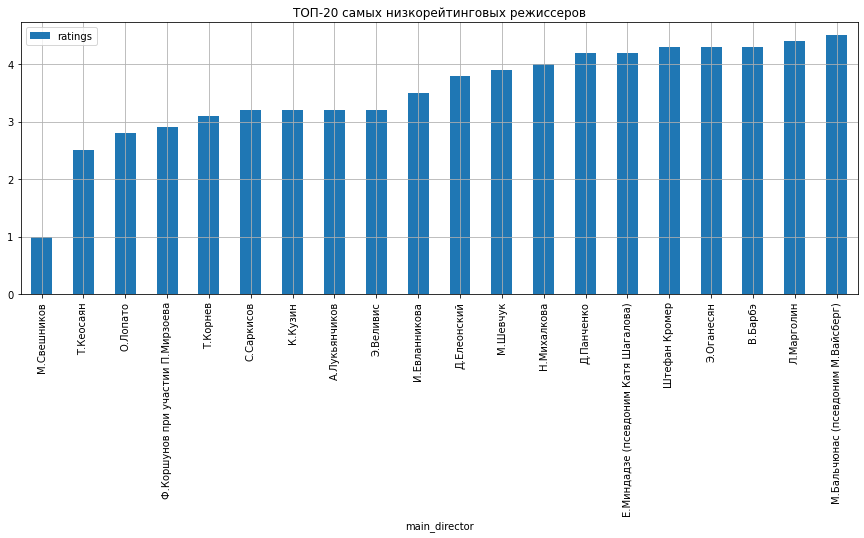

In [94]:
df_supported.pivot_table(
    index='main_director',
    values='ratings',
    aggfunc='median'
).sort_values('ratings').head(20).plot(
    kind='bar', 
    grid=True,
    title='ТОП-20 самых низкорейтинговых режиссеров',
    figsize=(15,5)
)
plt.show()

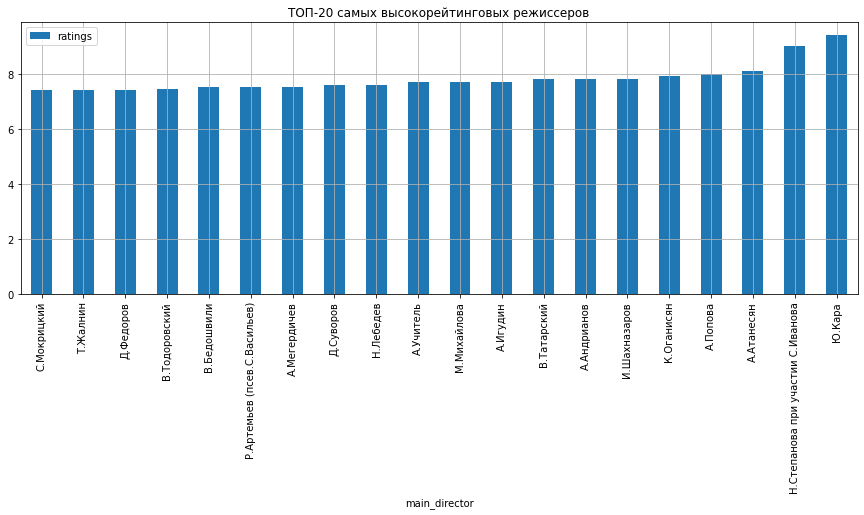

In [95]:
df_supported.pivot_table(
    index='main_director',
    values='ratings',
    aggfunc='median'
).sort_values('ratings').tail(20).plot(
    kind='bar', 
    grid=True,
    title='ТОП-20 самых высокорейтинговых режиссеров',
    figsize=(15,5)
)
plt.show()

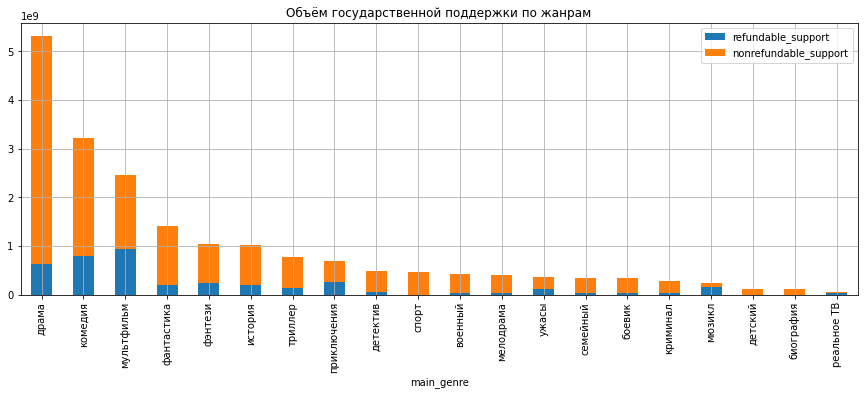

In [96]:
df_supported.groupby('main_genre') \
            .agg('sum') \
            .sort_values(by='full_support',
                         ascending=False) \
            .plot(title='Объём государственной поддержки по жанрам',
                  kind='bar',
                  stacked=True,
                  y=['refundable_support', 'nonrefundable_support'],
                  grid=True,
                  figsize=(15,5)
                 )
plt.show()

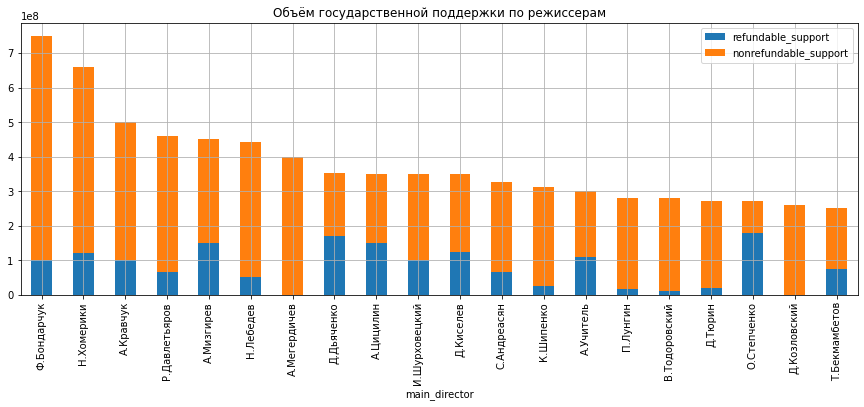

In [97]:
df_supported.groupby('main_director') \
            .agg('sum') \
            .sort_values(by='full_support', ascending=False) \
            .head(20) \
            .plot(title='Объём государственной поддержки по режиссерам',
                  kind='bar',
                  stacked=True,
                  y=['refundable_support', 'nonrefundable_support'],
                  grid=True,
                  figsize=(15,5)
                 )
plt.show()

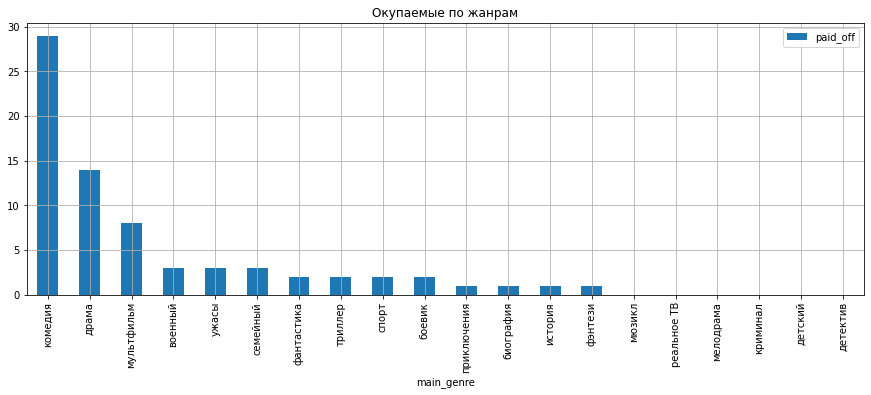

In [98]:
df_supported.pivot_table(
    index='main_genre',
    values='paid_off',
    aggfunc='sum'
).sort_values('paid_off', ascending=False).plot(
    kind='bar', 
    grid=True,
    title='Окупаемые по жанрам',
    figsize=(15,5)
)
plt.show()

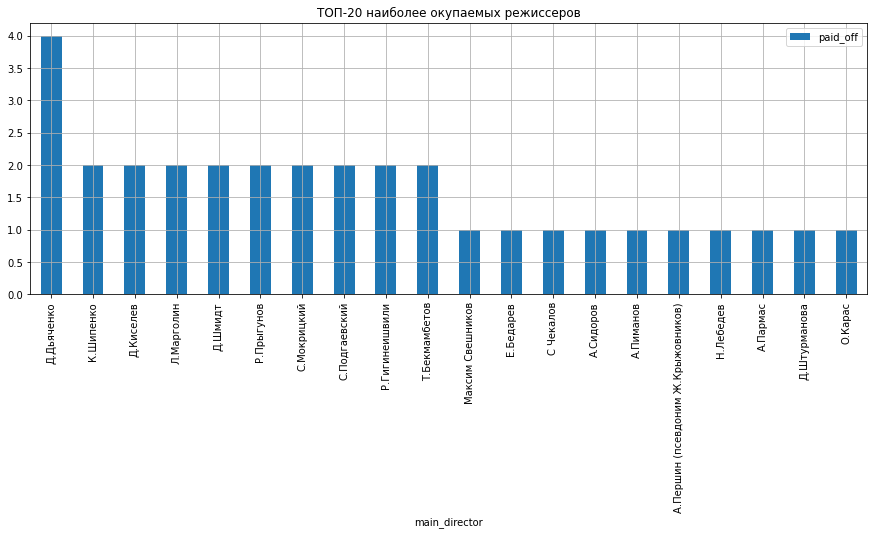

In [99]:
df_supported.pivot_table(
    index='main_director',
    values='paid_off',
    aggfunc='sum'
).sort_values('paid_off', ascending=False).head(20).plot(
    kind='bar', 
    grid=True,
    title='ТОП-20 наиболее окупаемых режиссеров',
    figsize=(15,5)
)
plt.show()

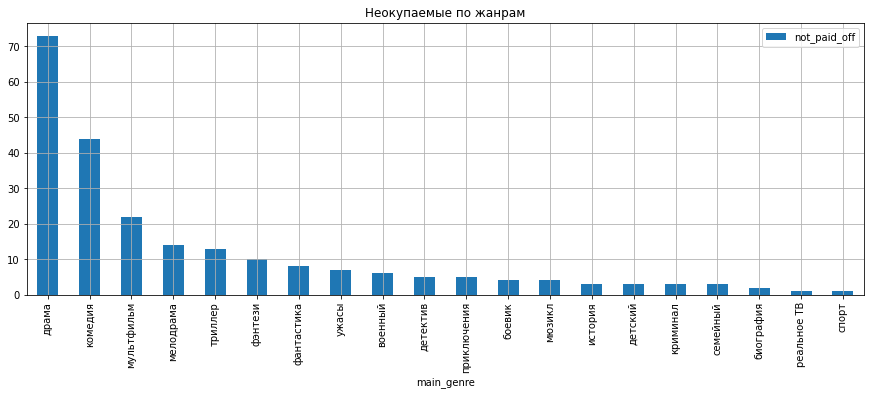

In [100]:
df_supported.pivot_table(
    index='main_genre',
    values='not_paid_off',
    aggfunc='sum'
).sort_values('not_paid_off', ascending=False).plot(
    kind='bar', 
    grid=True,
    title='Неокупаемые по жанрам',
    figsize=(15,5)
)
plt.show()

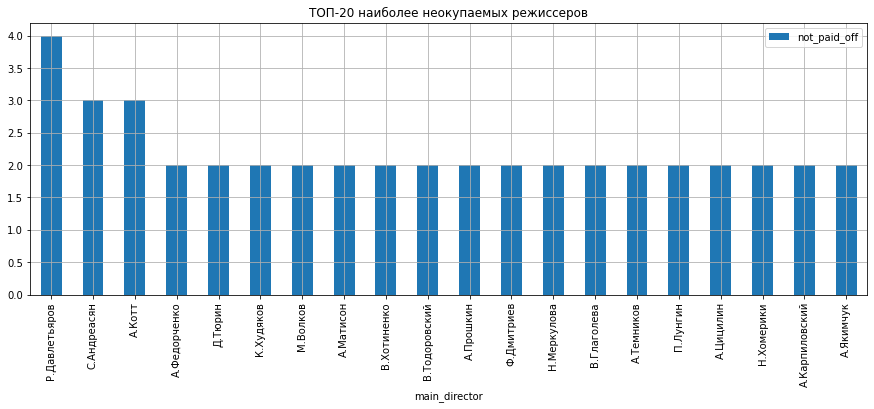

In [101]:
df_supported.pivot_table(
    index='main_director',
    values='not_paid_off',
    aggfunc='sum'
).sort_values('not_paid_off', ascending=False).head(20).plot(
    kind='bar', 
    grid=True,
    title='ТОП-20 наиболее неокупаемых режиссеров',
    figsize=(15,5)
)
plt.show()

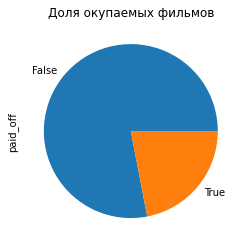

In [102]:
df_supported.groupby('paid_off')['paid_off'].agg('count').plot(
    kind='pie', 
    title='Доля окупаемых фильмов'
)
plt.show()

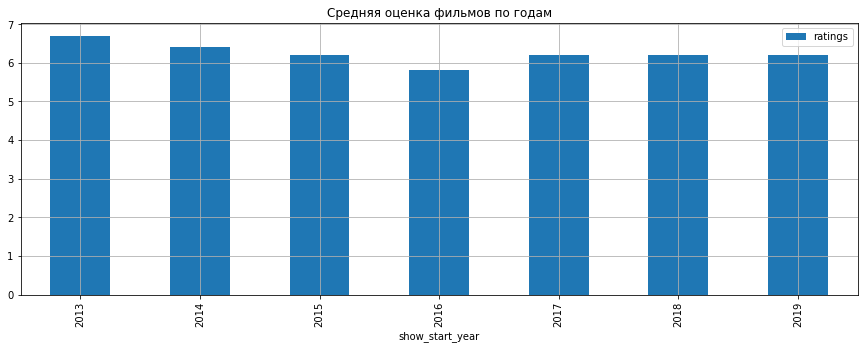

In [103]:
df_supported.pivot_table(
    index='show_start_year',
    values='ratings',
    aggfunc='median'
).plot(
    kind='bar', 
    grid=True,
    title='Cредняя оценка фильмов по годам',
    figsize=(15,5)
)
plt.show()

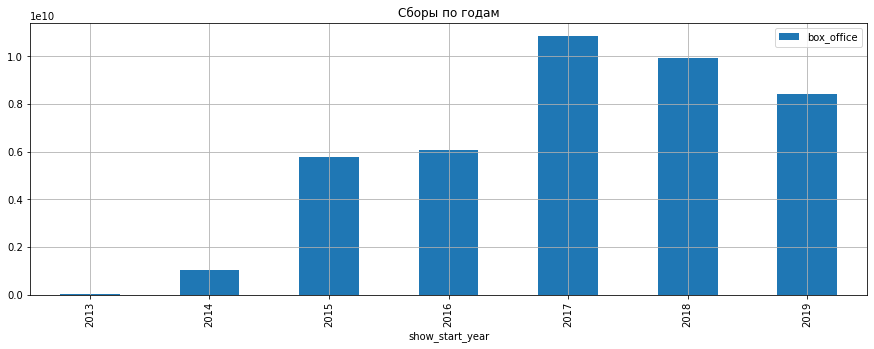

In [104]:
df_supported.pivot_table(
    index='show_start_year',
    values='box_office',
    aggfunc='sum'
).plot(
    kind='bar', 
    grid=True,
    title='Сборы по годам',
    figsize=(15,5)
)
plt.show()

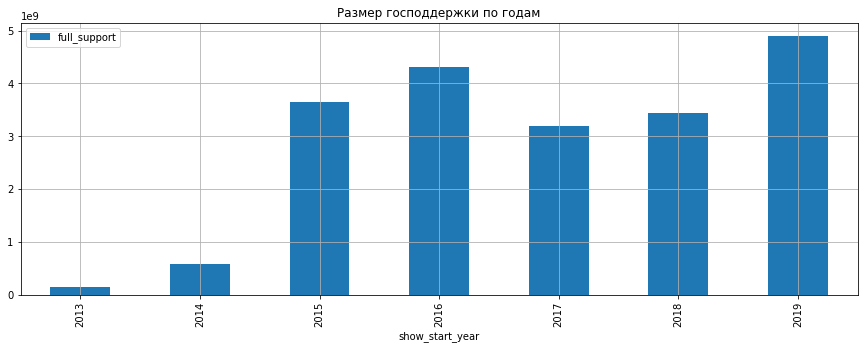

In [105]:
df_supported.pivot_table(
    index='show_start_year',
    values='full_support',
    aggfunc='sum'
).plot(
    kind='bar', 
    grid=True,
    title='Размер господдержки по годам',
    figsize=(15,5)
)
plt.show()

Итого, мы видим, что наиболее высокий рейтинг у фильмов жанра криминал, а наиболее рейтинговые фильмы выпустил Ю.Кара, наименее рейтинговые фильмы жанра семейный и у режиссера М.Свешникова.

Больше всего поддерживаются из госбюджета фильмы жанра драма (они же являются самыми неокупаемыми) и фильмы М.Бондарчука и больше всего в объеме поддержки возвратные средства. А самые окупаемые оказались комедии.

При всем при этом доля окупаемых фильмов вцелом составляет около 20% от всех фильмов с господдержкой и рейтинг фильмов не растет год к году. В то время, как сборы подросли к 2017, но затем все равно стали падать.

### Шаг 5. Напишите общий вывод

Итак, мы изучили данных о российском кинопрокате в период 2010-2019 гг.

Мы обработали полученный архив данных - объединили 2 таблицы с данными, обработали пропущенные значения там, где это необходимо и возможно, заменили типы данных на необходимые для удобной работы, избавились от неявных дубликатов. Посчитали и добавили в таблицу долю господдержки по фильмам, которые финансировались из госбюджета, год выпуска фильма в прокат, основного режиссера и жанр фильмов. Далее изучили данные о прокате фильмов и отдельно изучили размер господдержки фильмов и их окупаемость. Из изученных данных можем сделать следующие выводы:
- Наибольшее количество фильмов вышло в 2010 году, но при этом у нас за этот период наименьшее количество данных по сборам. Всего по всем данным у нас имеется 42% данных по сборам, наиболее полные данные в период с 2015 по 2019 г.
- В период с 2010 по 2018 год сборы росли, в 2019 наблюдается небольшой спад. Минимальные сборы были в 2010, максимальные - в 2018. Однако, с учетом того, что информации по сборам именно в 2010 у нас меньше всего (10%), данные по сборам в этом году малоинформативны. Поэтому посмотрим на данные 2015-2019 годов, там доля имеющейся информации по сборам более 50%. В данном срезе - минимальные сборы у нас в 2015 году.
- Некоторые фильмы собирают гораздо больше других фильмов, что как мне кажется вполне нормально.
- В период 2015-2019 меньше всего собираали фильмы 0+, скорее всего из-за того, что их не так много выходит и детям младше 6 лет не очень интересно ходить в кино, в отличие от тех же категорий 6+ и 12+. Больше всего сборов у фильмов 16+. Чаще всего в кино ходит молодежь, да и взрослые тоже любят кино. А вот по фильмам 18+ интересная особенность - выходит их довольно много, но сборов мало. Скорее всего это связано со спецификой самих фильмов - ужасы, например, не все любят.
- Больше всего фильмов с господдержкой вышло в 2015 году, а меньше всего поддерживали киноиндустрию в 2013. С 2016 господдержка начала уменьшаться, а с 2019 снова стала расти. Средний рейтинг у таких фильмов - 6,2, что является не очень высоким рейтингом. У большей части фильмов доля господдержки порядка 60%. Наиболее высокий рейтинг у фильмов жанра криминал, а наиболее рейтинговые фильмы выпустил Ю.Кара, наименее рейтинговые фильмы жанра семейный и у режиссера М.Свешникова.Больше всего поддерживаются из госбюджета фильмы жанра драма (они же являются самыми неокупаемыми) и фильмы М.Бондарчука и больше всего в объеме поддержки возвратные средства. А самые окупаемые оказались комедии. При всем при этом доля окупаемых фильмов вцелом составляет около 20% от всех фильмов с господдержкой, что является крайне маленькой окупаемостью. Из чего мы делаем вывод, что российское кино находится не в лучшей своей форме, даже несмотря на господдержку.